# Titanic DataSet

### Loading The DataSet

In [1]:
original_data = pd.read_csv('/Users/kavach/Downloads/titanic.csv')

In [2]:
df = original_data


In [3]:
test = pd.read_csv('/Users/kavach/Downloads/test.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Changing the name of Columns for easier Accessibility 

In [5]:
df = df.rename(columns = {
    'Embarked' : 'Location', 'Pclass' : 'Class'})

In [6]:
df.head()

,PassengerId,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Location
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# df['children'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Class        891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Location     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dropped the Cabin Column since it had alot of Nan Values and other Columns which were of no use.

In [8]:
df=df.drop(['Name','PassengerId','Ticket', 'Cabin'], axis=1)

<AxesSubplot:ylabel='Frequency'>

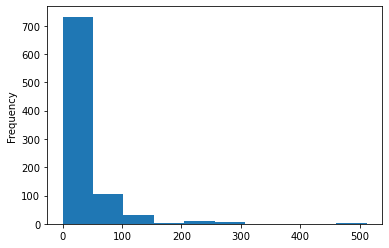

In [9]:
df['Fare'].plot(kind='hist')

9

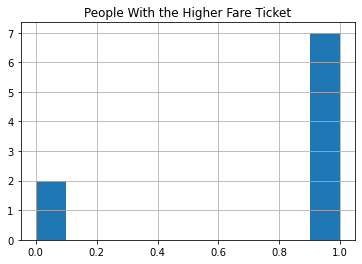

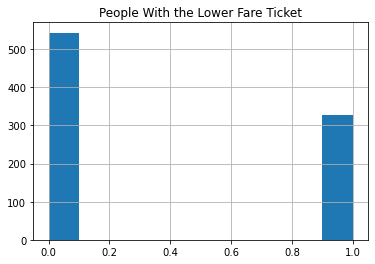

In [10]:
df_fare = df[df['Fare'] > 250]

df_min = df[df['Fare'] <=  199]
# fig,axes = plt.subplots(1, 2)

df_fare.hist('Survived')
plt.title('People With the Higher Fare Ticket')
df_min.hist('Survived')
plt.title('People With the Lower Fare Ticket')
len(df_fare)

#### We are able to see that the people with higher fare ticker had very higher chances of Surviving as compared to the people with lower fare.

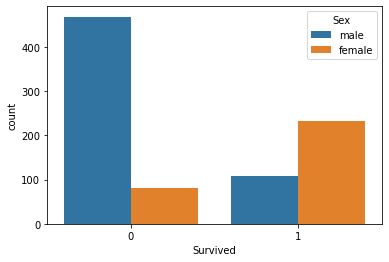

In [11]:
import seaborn as sns

df.Sex.value_counts()
df_groupBy=df.groupby('Sex')

ax=sns.countplot(x='Survived', hue='Sex', data=df)




#### There are clearly more Male than Female on the Ship and chances of Female Survivng were very high

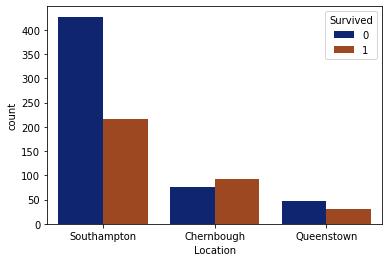

In [12]:
ax=sns.countplot(x='Location',hue='Survived', data=df,palette='dark')
ax.set_xticklabels(["Southampton", "Chernbough", 'Queenstown'])
plt.show()


## *People with Class*

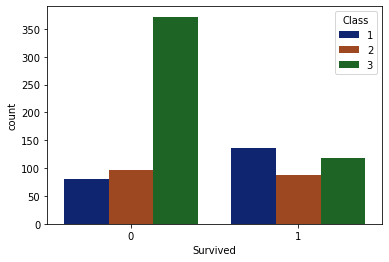

In [13]:
ax = sns.countplot(x='Survived', hue='Class', data=df, palette='dark')


## People from 1st Class had higher chance of getting Saved

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

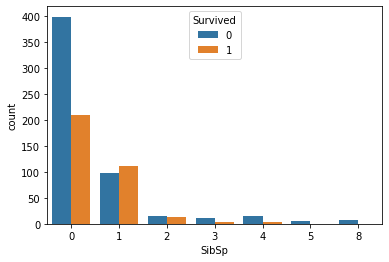

In [14]:
sns.countplot(x='SibSp',hue='Survived', data=df)
df.SibSp.value_counts()

## People who had one Spouse Survived the most

<AxesSubplot:xlabel='Parch', ylabel='count'>

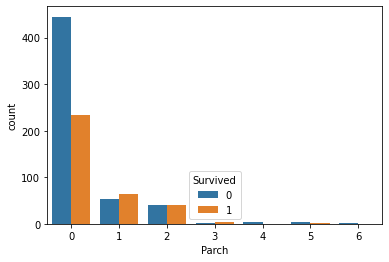

In [15]:
sns.countplot(x='Parch',hue='Survived', data=df)

## People who had one parent had higher chances of being saved.

In [16]:
tab = pd.crosstab(index=df['Class'], columns=df['Sex'])
tab

Sex,female,male
Class,,
1,94,122
2,76,108
3,144,347


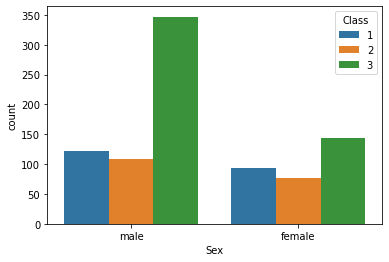

In [17]:
df_class = df.groupby('Class')
df_firstClass = df_class.get_group(1)
sns.countplot(x='Sex', hue='Class', data=df)
plt.show()

In [18]:
pd.crosstab(index=df['Class'], columns=[df['Survived'],df['Sex']])


Survived      0           1     
Sex      female male female male
Class                           
1             3   77     91   45
2             6   91     70   17
3            72  300     72   47

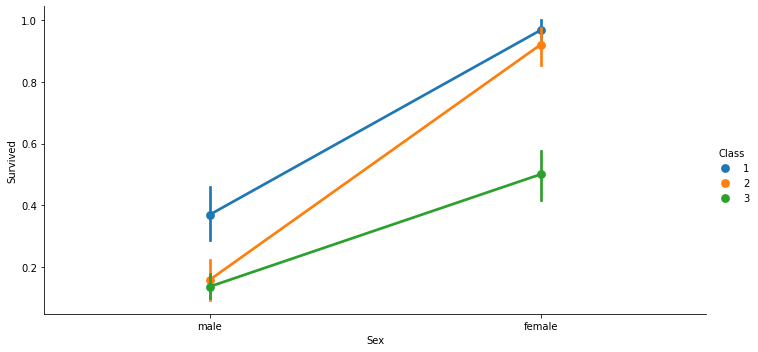

In [19]:
sns.factorplot('Sex', 'Survived', hue='Class', aspect=2, data=df)
plt.show()



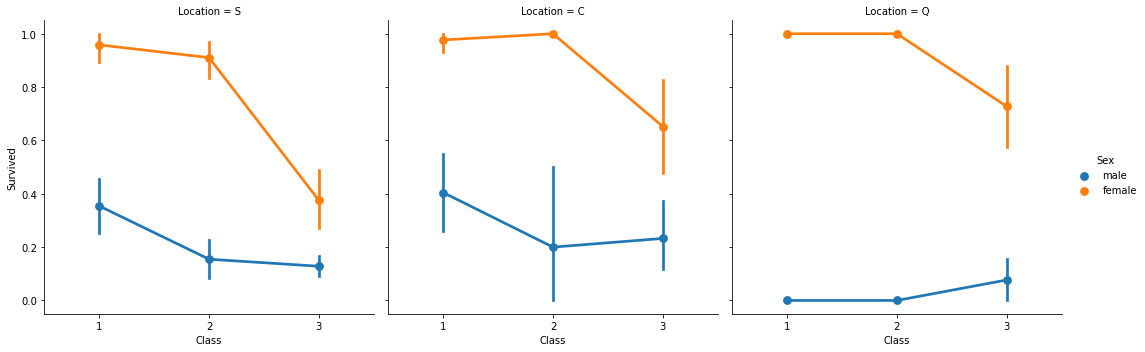

In [20]:
sns.factorplot(x='Class', y='Survived', hue='Sex', col='Location', data=df)

In [21]:
pd.crosstab(index=df['Location'], columns=df['Survived'])

Survived,0,1
Location,,
C,75,93
Q,47,30
S,427,217


In [22]:
pd.crosstab(index=df['Parch'], columns=df['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


<AxesSubplot:xlabel='Parch', ylabel='count'>

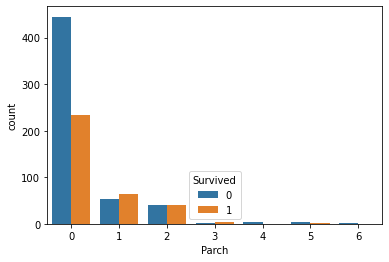

In [23]:
sns.countplot(x='Parch', hue='Survived', data=df)

<AxesSubplot:>

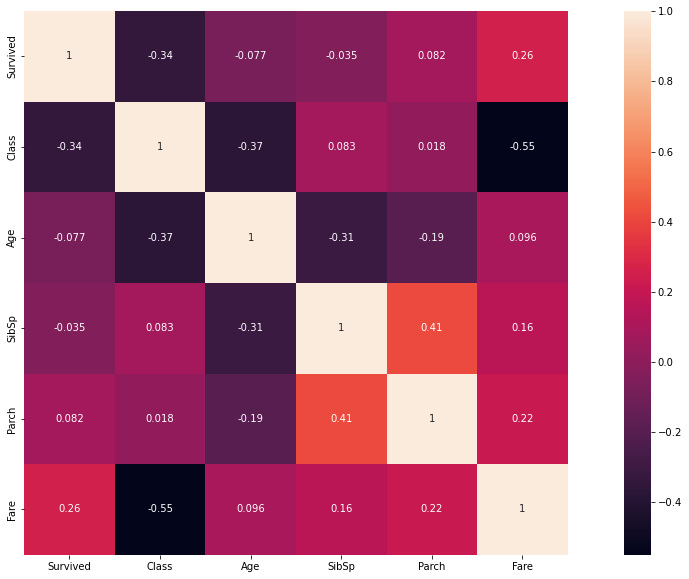

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(vmax=1, square=True, annot=True, data=df.corr())


## Doing Feature Engineering Now


## Making Pipelines

### For numerical Attributes

In [25]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


### For Categorical Attributes


In [26]:
from sklearn.preprocessing import OneHotEncoder


cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])


### Combinig Numerical and Categorical Pipeline

In [27]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])


In [28]:
X_train = preprocess_pipeline.fit_transform(
    original_data[num_attribs + cat_attribs])

### Adding Labels

In [29]:
y_train = original_data['Survived']


## Model Training

In [37]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)



SVC(gamma='auto')

### Our Model is trained we will use this to make predictions on the Test Set

In [38]:
X_test = preprocess_pipeline.transform(test[num_attribs + cat_attribs])
y_pred = svm_clf.predict(X_test)

In [32]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()


0.8249313358302123

## Uploading File to the Kaggle

In [33]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
submission = pd.DataFrame(
    {'PassengerId': test['PassengerId'], 'Survived': y_pred})

#Visualize the first 5 rows
submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [35]:
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename, index=False)

print('Saved file: ' + filename)


Saved file: Titanic Predictions 1.csv


# Insights Gained From the DataSet

- Most of the people who were aged from 0-15 were saved
- People with higher fare had higher chances of being saved
- Female were saved more, being the fact that there were more men than Female
- People who were in the 1st class were saved more
- Female from the 1st Class had almost 100% Survival Rate
- People who had One spouse also had higher chances of being saved.


# Conclusion

- People with low class, low fare-ticket, single and especially men witnessed the highest death, whereas Female with from 1st class had almost 100% Survival rate.



## Possible more Questions

- Adding Data of the People with their Caste ,creed, race, religion  and seeing who survived the most and was there any discrimination or not in that.
- Checking if in the men, it was the staff of the Ship which was saved, and if that is true that means, almost all most men died and especially general Men from 3rd class witnessed 100% death rate.
- Was there any Female staff in the Ship and what was there Survival Chances.
- Among the staff of the Ship, was there also discrimination according to the Rank of staff being saved.
